# Document Alignment
### Complete # TODO

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Read Tempalate and Scanned Image

In [ ]:
refFilename = os.path.join("images", "form.jpg")

im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)

im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

imFilename = os.path.join("images", "scanned-form.jpg")

im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)

im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)


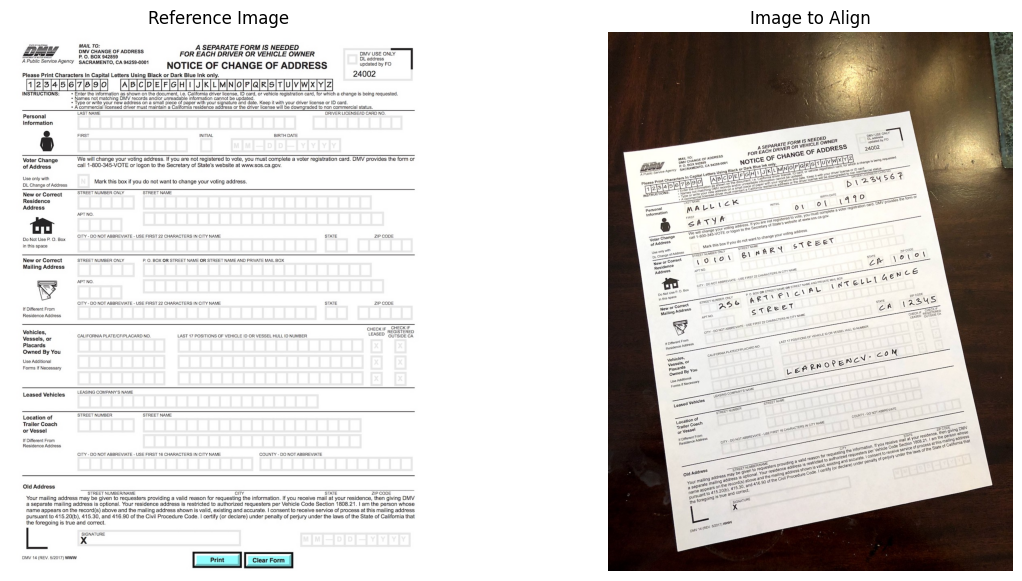

In [ ]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(im1)
plt.title('Reference Image')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(im2)
plt.title('Image to Align')
plt.axis("off")
plt.show()


## Step 2: Find keypoints in both Images

Think of keypoints as corner points that are stable under image transformations

In [ ]:
im1_gray = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)



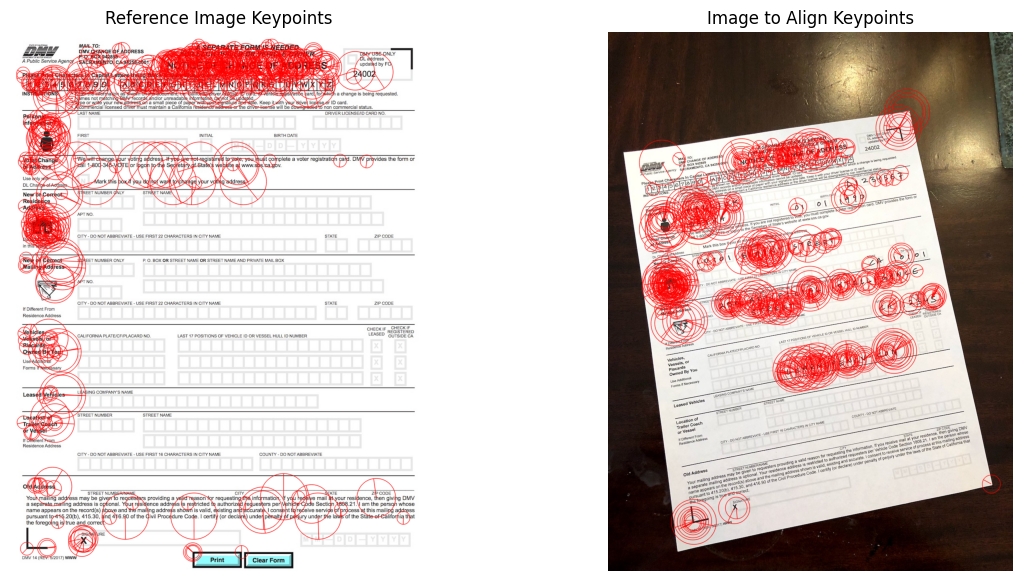

In [ ]:
im1_display = cv2.drawKeypoints(
    im1,
    keypoints1,
    outImage=np.array([]),
    color=(255, 0, 0),
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

im2_display = cv2.drawKeypoints(
    im2,
    keypoints2,
    outImage=np.array([]),
    color=(255, 0, 0),
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(im1_display)
plt.title('Reference Image Keypoints')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(im2_display)
plt.title('Image to Align Keypoints')
plt.axis("off")
plt.show()

## Step 3 : Match keypoints in the two image

In [ ]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

matches = list(matcher.match(descriptors1, descriptors2, None))

matches.sort(key=lambda x: x.distance, reverse=False)

numGoodMatches = int(len(matches) * 0.1)

matches = matches[:numGoodMatches]


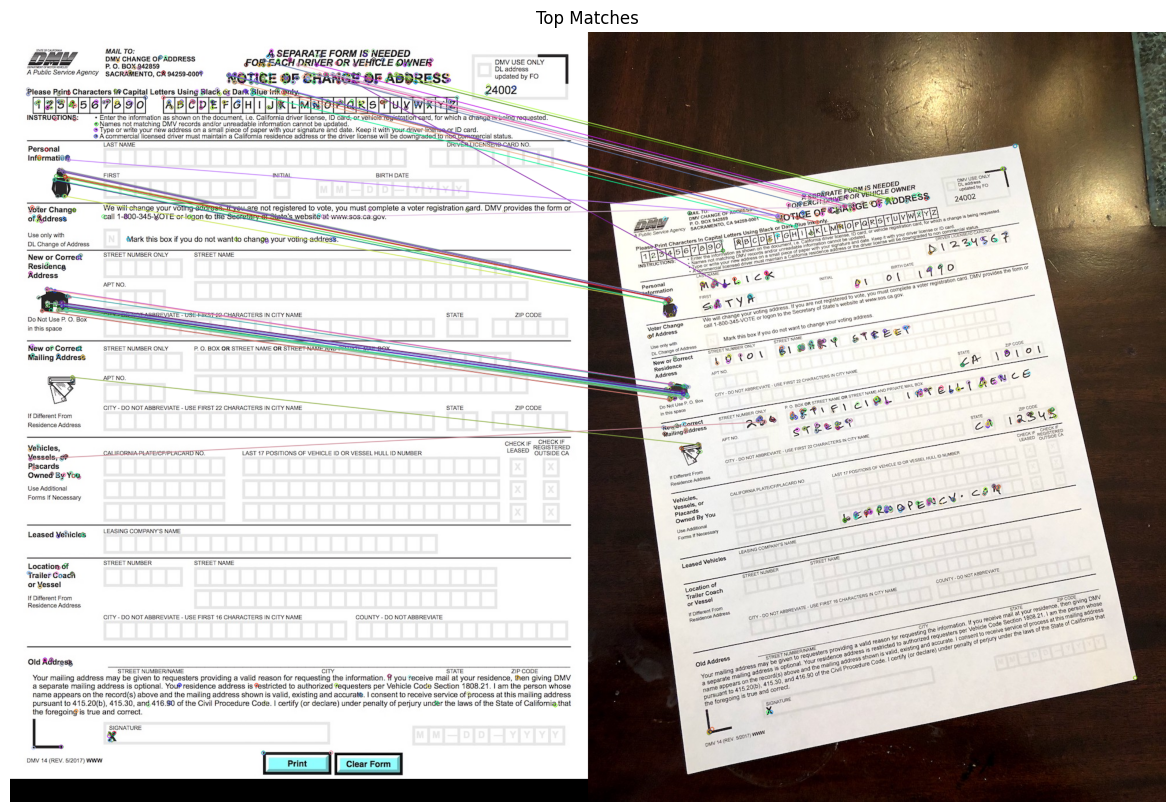

In [ ]:
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=(20, 10))
plt.imshow(im_matches)
plt.title('Top Matches')
plt.axis("off")
plt.show()



## Step 4:  Find Homography



In [ ]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)



## Step 5: Warp image

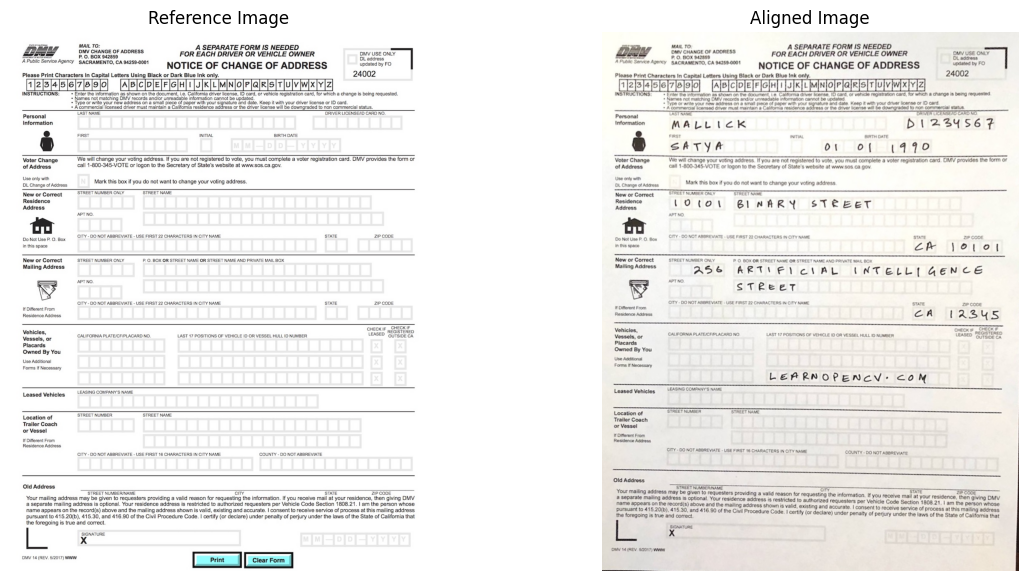

In [ ]:
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(im1)
plt.title('Reference Image')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(im2_reg)
plt.title('Aligned Image')
plt.axis("off")
plt.show()